# Ensembles

## Introduction

>The statement, __' the collective is smarter than the individual',__ holds true in many cases. However, if we attempt to build an ensemble with multiple instances of the same model on the same dataset, the statement would be false.

This is because the instances would all be identical (other than the differences induced by any stochasticity in the optimisation process. Consequently, they would all make the same mistakes, and combining their predictions would not result in any improvement. 

Mathematically, ensembles work because the mistakes made between models are not correlated. This is because all the errors are correlated.

To ensure that the model errors are not correlated, the models should not be trained on the same dataset; otherwise, all the errors would be the same for each model (if the model is a deterministic one that always produces the same model via the training process on the same data).
There are different strategies to achieve varying predictions (and uncorrelate the errors), some of which will be discussed below. 

## Bootstrapping Datasets and Bagging
The first approach involves training the models on different data. We can 'bootstrap' new datasets by sampling with replacements from existing datasets.
The bootstrapped datasets do not have to be as large as the original datasets. The process of bootstrapping datasets on which to train different models and aggregating their results is known as bootstrap aggregating or **bagging**.

In [ ]:
# Run this cell to download the necessary package to run the next cells
!wget "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/get_colors.py" "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/utils.py"

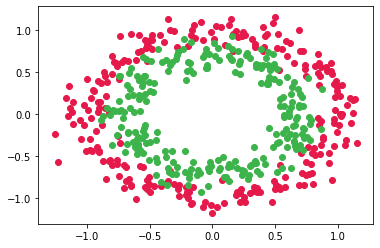

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
from utils import get_classification_data, show_data, colors

def create_bootstrapped_dataset(existing_X, existing_Y, size):
    """Create a single bootstrapped dataset"""
    idxs = np.random.choice(np.arange(len(existing_X)), size=size, replace=True) # randomly sample indices with replacement
    return existing_X[idxs], existing_Y[idxs] # return examples at these indices

m = 500
X, Y = get_classification_data(m=m, variant='circles', noise=0.1, factor=0.7)
show_data(X, Y)
n_trees = 10
dataset_size = int(m / 5)
bootstrapped_datasets = create_bootstrapped_dataset(X, Y, dataset_size)

## Making Predictions Using a Single Decision Tree

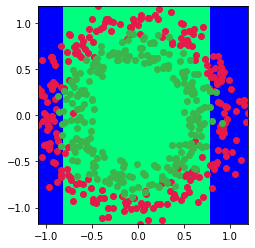

In [3]:
import sklearn.tree
from utils import visualise_predictions

tree = sklearn.tree.DecisionTreeClassifier(max_depth=2) # attempt with a large depth (overfit) and then a low depth (underfit)
tree.fit(X, Y)
visualise_predictions(tree.predict, X, Y)

The main problem with decision trees is that they are extremely susceptible to overfitting. In other words, these models often have a high variance, which can be reduced by reducing the max depth of the tree. 

However, this would reduce the capacity of the model and increase its bias: the classic bias-variance trade-off.

Another way to reduce the variance is to use relatively simple trees with a low max depth. Thus, we can reduce their bias by combining these simple treess' predictions after training each of them on different data.
We combine the predictions by either taking the mode (for classification) or the mean (for regression). An ensemble of decision trees is called a **random forest**.


## Random Forests
Random forests are ensembles of decision trees (many trees make a forest).

### Learning on feature subsets
Another way to guarantee differing predictions and further uncorrelate the errors is to allow the model to make predictions based on a limited number of features. 
That is, we train each model on the features of examples from the dataset that have been projected into a subspace of the feature space.

Recall that the randomness in random forests is induced in two ways:
1. By training each tree on a random dataset bootstrapped from the original.
2. By having each tree project the dataset into a subspace of the feature space before fitting it.

### Implementation of random forest

Let us use the sklearn `DecisionTreeClassifier` as our model and train an ensemble of them on different random subspaces of features to create a random forest.

In [4]:
def project_into_subspace(X, feature_idxs):
    """
    Returns only the features of dataset X at the indices provided 
    feature_idxs should be a list of integers representing the indices of the features that should remain 
    """
    return X[:, feature_idxs] # slice out wanted features, excluding the others

projected_X = project_into_subspace(X, [0])
print(projected_X)
print(X)

 ]
 [ 0.49430104]
 [ 0.65535307]
 [ 0.46564465]
 [ 0.08138059]
 [-1.05396673]
 [ 0.46647585]
 [-0.93939517]
 [ 0.63417491]
 [-0.21428156]
 [ 0.69346447]
 [ 0.3535912 ]
 [ 0.72830354]
 [ 0.07563741]
 [ 0.23892362]
 [-0.15622619]
 [-0.60872073]
 [-0.44442984]
 [ 0.62168869]
 [ 0.52639251]
 [ 0.13397331]
 [ 0.26282027]
 [-0.4418767 ]
 [-0.23875883]
 [-0.29235859]
 [-1.03529767]
 [-0.96406031]
 [-0.61543535]
 [-0.17031438]
 [-0.70906208]
 [-0.19639947]
 [ 0.06453897]
 [-0.45352708]
 [-0.14715518]
 [ 1.09136943]
 [-0.51661713]
 [-0.144863  ]
 [-0.70386638]
 [ 0.94351216]
 [-0.68764456]
 [-0.10447128]
 [-0.21244799]
 [-0.38455756]
 [-0.69060973]
 [ 0.69181078]
 [ 0.75004532]
 [-0.28076257]
 [ 0.40100239]
 [-0.68439589]
 [-0.82857004]
 [ 0.16073671]
 [ 0.46943421]
 [ 0.91881957]
 [-0.8374379 ]
 [ 0.55083925]
 [ 0.9013798 ]
 [-0.22149287]
 [ 0.16192846]
 [-0.17568069]
 [ 0.35513311]
 [ 0.55858503]
 [-0.61704775]
 [ 0.90867856]
 [ 0.44581364]
 [ 0.02028961]
 [ 0.71817183]
 [ 0.55573517]
 [-0.97

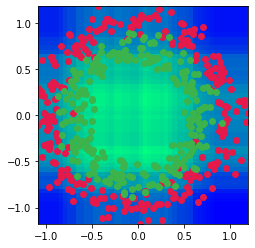

forest: [
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            0
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "features": [
            1
        ]
    },
    {
        "depth": 2,
        "feature

In [5]:
import json

class RandomForest:
    def __init__(self, n_trees=10, max_depth=4, max_samples=10):
        self.n_trees = n_trees # how many trees in the forest
        self.max_depth = max_depth # what is the max depth of each tree
        self.trees = [] # init an empty list of trees
        self.max_samples = max_samples # how many samples from the whole dataset should each tree be trained on

    def fit(self, X, Y):
        """Fits a bunch of decision trees to input X and output Y"""
        for tree_idx in range(self.n_trees): # for each bootstrapped dataset
            bootstrapped_X, bootstrapped_Y = create_bootstrapped_dataset(X, Y, size=self.max_samples) # get features and labels of new bootstrapped dataset
            n_features = np.random.choice(range(1, bootstrapped_X.shape[1])) # choose the number of features to be used by this tree to make predictions
            subspace_feature_indices = np.random.choice(range(bootstrapped_X.shape[1]), size=n_features) # randomly choose that many features to use as inputs
            projected_X = project_into_subspace(bootstrapped_X, subspace_feature_indices) # remove unused features from the dataset
            tree = sklearn.tree.DecisionTreeClassifier(max_depth=self.max_depth) # init a decision tree
            tree.fit(projected_X, bootstrapped_Y) # fit the tree on these examples
            tree.feature_indices = subspace_feature_indices # give the tree a new attribute: which features were used 
            self.trees.append(tree) # add this tree to the list of trees

    def predict(self, X):
        """Use the fitted decision trees to return predictions"""
        predictions = np.zeros((len(X), self.n_trees)) # empty array of predictions with shape n_examples x n_trees
        for tree_idx, tree in enumerate(self.trees): # for each tree in our forest
            x = project_into_subspace(X, tree.feature_indices) # throw away some features of each input example for this tree to predict based on those alone
            predictions[:, tree_idx] = tree.predict(x) # predict the integer label
        prediction = np.mean(predictions, axis=1) # average predictions from different models
        # prediction = np.round(prediction).astype(int) # comment this line to show probability confidences of predictions rather than integer predictions
        return prediction

    def __repr__(self):
        """Returns a string representation of the random forest"""
        forest = [] # init an empty list of trees
        for idx, tree in enumerate(self.trees): # for each tree in the forest
            forest.append({ # add a dictionary of info about the tree
                'depth': tree.max_depth, # how many binary splits?
                'features': tree.feature_indices.tolist() # which features is it using
            })
        return json.dumps(forest, indent=4) # convert dict to string with a nice indentation

randomForest = RandomForest(n_trees=80, max_depth=2, max_samples=10) # fit many considerably weak (depth=2) learners
randomForest.fit(X, Y) # fit model
randomForest.predict(X) # make predictions
visualise_predictions(randomForest.predict, X, Y) # visualise
print('forest:', randomForest) # use our __repr__ method to visualise the tree

As shown by the visualisation of our predictions above, the decision boundary of the ensemble is significantly more complex than that of the single model alone.
That is, the capacity of the ensemble can be considerably higher than that of the individual model.
Ensembling can transform many 'weak learners' into 'strong learners'.

Experiment with the ensemble hyperparameters and attempt to approximate an elliptical decision boundary.

### Sklearn implementation


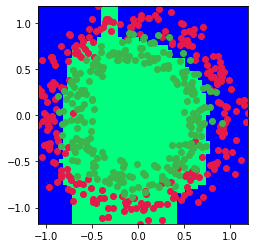

0.78

In [6]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=80, max_depth=2, max_samples=10) # init random forest
randomForest.fit(X, Y) # fit random forest of decision trees
visualise_predictions(randomForest.predict, X, Y) # visualise
randomForest.score(X, Y) # use the model's score method to compute its accuracy

## Conclusion
At this point, you should have a good understanding of
- how to bootstrap datasets.
- how to build ensembles by aggregating predictions.
- bagging.
- random forests and how to implement them.
- how to implement ensembles.